In [1]:
import numpy as np
import numpy.random as rng
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
sns.set()

In [2]:
# simulate Y(1:100)
T = 100
phi = .95
sv = 1.0
su = 1.0
s0 = np.sqrt(su**2 / (1-phi**2))

x = np.zeros(T)
y = np.zeros(T)

x[0] = s0 * rng.standard_normal()
y[0] = x[0] + sv * rng.standard_normal()
for i in range(1,T):
  x[i] = phi * x[i-1] + su * rng.standard_normal()
  y[i] = x[i] + sv * rng.standard_normal()

In [3]:
# BOOTSTRAP SIS
N = 1000
XB = np.zeros(N*T).reshape(T,N)
WB = np.zeros(N*T).reshape(T,N)

# amostro aproximacao de p(x1|y1)
XB[0] = s0 * rng.standard_normal(N) 
WB[0] = -(y[0]-XB[0])**2/(2*sv**2)
# amostro condicionalmente aproximacao de p(x1:t|y1:t)
for t in range(1,T):
  XB[t] =  phi * XB[t-1] + su * rng.standard_normal(N)
  WB[t] = WB[t-1] - (y[t]-XB[t])**2/(2*sv**2)

In [4]:
# http://users.isy.liu.se/rt/schon/Publications/HolSG2006.pdf
def norm_weights(w):
  maxw = np.max(w)
  sw = np.exp(w-maxw).sum()
  return np.exp(w-maxw-np.log(sw))

# implement resampling algorithm
def resample(W, A):
  N = W.shape[0]
  p = norm_weights(W)
  O = rng.multinomial(N,p)
  acc = 0
  for i in range(N):
    for j in range(O[i]):
      A[acc] = i
      acc = acc + 1
  return A


In [5]:
A = np.empty(N,dtype=int)
resample(WB[3],A)
print(A[1:10])
XB[3,A[1:10]]


[ 0  0  0  0 10 10 10 10 10]


array([3.23650107, 3.23650107, 3.23650107, 3.23650107, 4.39396258,
       4.39396258, 4.39396258, 4.39396258, 4.39396258])

In [6]:
# BOOTSTRAP SIR
N = 1000
XB = np.zeros(N*T).reshape(T,N)
WB = np.zeros(N*T).reshape(T,N)
AB = np.zeros(N*(T-1),dtype=int).reshape(T-1,N)

# amostro aproximacao de p(x1|y1)
XB[0] = s0 * rng.standard_normal(N) 
WB[0] = -(y[0]-XB[0])**2/(2*sv**2)
# amostro condicionalmente aproximacao de p(x1:t|y1:t)
for t in range(1,T):
  resample(WB[t-1],AB[t-1])  
  XB[t] =  phi * XB[t-1,AB[t-1]] + su * rng.standard_normal(N)
  WB[t] =  - (y[t]-XB[t])**2/(2*sv**2)

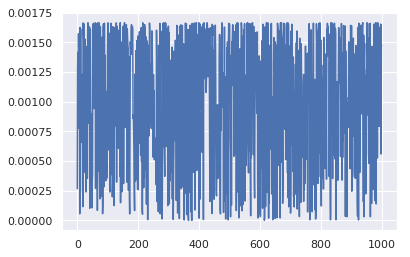

In [7]:
plt.plot(norm_weights(WB[6]))

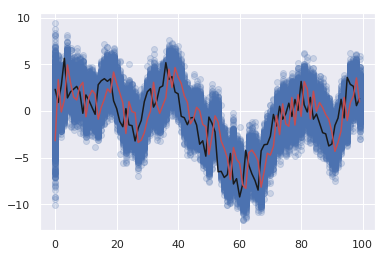

In [17]:
plt.plot(XB,'ob',alpha=0.2);
plt.plot(y,color='k')

In [14]:
XM = []
for i in range(0,100):
    XM.append(sum(XB[i,:]*WB[i,:])/sum(WB[i,:]))

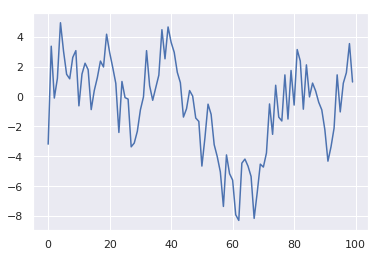